# PSU DS 200
# Fall 2024
# Lab 9 Learning Decision Tree-based Prediction Model: NFL Pass Completion Prediction

## Instructor: Dr. John Yen
## LAs:  Lauren Miller, Aaron Almeida, Amiera Masheetah Binti Irwan Rizalman, and Sharifah Rodziah Hanim BintiSyed Alwi

## Total 5 Exercises:
- Exercise 1: 1 point
- Exercise 2: 0.5 point
- Exercise 3: 0.5 point
- Exercise 4: 1 point
- Exercise 5: 1 point

## Total: 4 points

## Due: 11:59 pm, October 30, 2024
## Early Submission: 11:59 pm, October 27, 2024 (10% bonus)

## Learning Objectives

In this lab, you will learn to be able to do the following:
- Learn a decision tree model for predicting pass completing using a structured data from an NFL game.
- Learn about the hyper-parameters that need to be specified for decision tree learning.
-  Split a set of labelled data with desired prediction output (e.g., pass complete or incomplete) into two groups: (1) those data to be used to "train" the model, and (2) those data to be used to test how well the model can predict.
- Interpret the decision tree model by extracting "decision rules" from the true.  This is important to explain to decision makers the rationale/reason of the model's prediction.  This is often referred to as **explainable AI**.
- Understand that the selection of feature tests in decision tree learning is based on maximizing expected information gain (i.e., maximizing expected reduction of entropy of class probability distribution).

In [1]:
import numpy as np
import graphviz

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from datascience import *

In [3]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

## Reading Data for Constructing a Predictive Model
### Format of the Data
Data for constructing a predictive model is often stored in a "Comma-Separated Values" format, also commonly referred to as "CSV" format.  A file that stores data in CSV format uses ".csv" as its file extension.  

### Upload Data to Google Drive under DS200F24
Like previous labs, upload two CSV files for the lab from Canvas to Google Drive under the directory DS200Labs:
- Ben-NE-9-10-1025-pass.csv

### Mount the Google Drive
Like previous labs, we mount Google Drive in Colab Notebook.





In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls /content/drive/My\ Drive/DS200F24/

Ben-NE-9-10-2015-pass.csv  united_summer2015.csv


## Reading Labelled Data into a Table


In [7]:
path1="/content/drive/My Drive/DS200F24/Ben-NE-9-10-2015-pass.csv"

In [8]:
Ben_table = Table.read_table(path1)
Ben_table.show(10)

down,ydstogo,Yards.Gained.PrevPlay,AirYards,PassLocation,PassOutcome
1,10,18,-4,1,1
1,10,0,9,1,1
3,22,6,1,1,1
1,10,0,7,-1,1
1,10,13,6,-1,1
1,10,12,7,-1,1
1,10,0,5,1,0
2,10,0,25,1,0
3,5,-1,6,-1,1
1,15,4,-1,1,1


# Features for Pass Completion Prediction

The first row of the CSV file contains the names of attributes/features for each passing play of a specific NFL game (between Pittsburgh Steelers and New England Patriots held on September 10th, 2015).  Because pass prediction model for each quaterback can be different, so this dataset is prepared for the purpose of predicting the outcome of passing play by Steeler quaterback Ben Rothlisberger. The last column of the CSV file contains the outcome of each passing play.

In general, the data for building a predictive model involves two types:
<ol>
    <li> The input data to the model (which we also call FEATURES), and </li>
    <li> The DESIRED prediction output data of the model (for each corresponding input), i.e., the labels in a labelled dataset. </li>
    </ol>
Together, these data are used to "train" the model, as we shall see later, so that the model's output,
given each input, is AS CLOSE AS POSSIBLE (we will elaborate this point later) to the DESIRED output.

For example, the data for training to predict pass completion includes input data for the prediction (e.g., distance of pass, number of down, yards to go, etc), and the DESIRED output of the prediction (i.e., whether a pass plays completes or not).

The meaning of all the input attributes/features for this lab are listed below:
<ul>
    <li>column 0: down: The number of down for the play</li>
    <li>column 1: ydstogo: The remaining yards needed to gain for a first down</li>
    <li>column 2: Yards.Gained.PrevPlay: The number of yards gained in the previous play (which can be a run play or passing play}</li>
    <li>column 3: AirYards: The distance between the starting position of the play and the receiving position of the passing play. A negative number means the quarterback moves back in the play such that the net yardage gain, if the pass completes, is negative. </li>
    <li>column 4: PassLocation: The area of passing location: -1 means left field, 0 means center field, 1 means right field. </li>
</ul>

The value of the desired prediction output (i.e., PassOutcome in the last column) in the dataset indicates whether the outcome of each passing play, represented by each row, is completes (i.e., having the value "1") or incomplete (i.e., having the value "0").  

# Split the Labelled Data into two Subgroups: One for Training, the other for Testing



In [9]:
# First, find out the size of the labelled data
data_size = Ben_table.num_rows

In [10]:
print(data_size)

70


# We will use the first 80% of the plays (data) for training, the last 20% of the plays (data) for testing.

## ``Ben_table.take(np.arange(0, training_size))`` returns a table that that is from the first row (row index 0) to the row with row index ``training_size - 1``.  Therefore, the number of rows in the ``training_table`` is ``training_size``.

## Similary, ``Ben_table(np.arange(training_size, data_size))`` returnbs a table that is from the row with index ``training_size`` to the row with index ``data_size - 1``.  Therefore, the number of rows in the ``testing_table`` is ``data_size - training_size``.

In [11]:
training_size = int(data_size * 0.8)

In [12]:
print(training_size)

56


In [13]:
training_table = Ben_table.take(np.arange(0,training_size))

In [14]:
training_table.show(2)

down,ydstogo,Yards.Gained.PrevPlay,AirYards,PassLocation,PassOutcome
1,10,18,-4,1,1
1,10,0,9,1,1


In [15]:
testing_table = Ben_table.take(np.arange(training_size, data_size))

In [16]:
testing_table.show(2)

down,ydstogo,Yards.Gained.PrevPlay,AirYards,PassLocation,PassOutcome
1,10,18,39,-1,0
2,9,1,7,-1,1


# We can extract contents of a ``Table`` object, using ``.values``, into an array.

# Machine learning modules, like the one we are using in this lab, often expect the input training data in the form of an array.

In [17]:
training_array = training_table.values

In [18]:
print(training_array)

[[ 1 10 18 -4  1  1]
 [ 1 10  0  9  1  1]
 [ 3 22  6  1  1  1]
 [ 1 10  0  7 -1  1]
 [ 1 10 13  6 -1  1]
 [ 1 10 12  7 -1  1]
 [ 1 10  0  5  1  0]
 [ 2 10  0 25  1  0]
 [ 3  5 -1  6 -1  1]
 [ 1 15  4 -1  1  1]
 [ 3 18 -6 17 -1  1]
 [ 1 20  5  5 -1  1]
 [ 2 11  9  4 -1  1]
 [ 2 13 -3 -2 -1  1]
 [ 3  6  7  6  0  1]
 [ 2  7  0 11  1  1]
 [ 1 10 13 16  1  1]
 [ 1 10 19  6  1  1]
 [ 2  8  2  0 -1  0]
 [ 3  8  0 39 -1  1]
 [ 3  3  1 19  1  0]
 [ 1 10  0 11  0  1]
 [ 2 10  0 17 -1  1]
 [ 1 10 18  7  0  1]
 [ 1  9  2  4 -1  1]
 [ 2  6  3  6  0  1]
 [ 1 10  0  5  1  1]
 [ 2 15  9  4 -1  1]
 [ 3  6  9 26  1  1]
 [ 2  8  2  0 -1  1]
 [ 3  3  5 23  1  0]
 [ 4  3  0  4  0  1]
 [ 2  5  5 26 -1  0]
 [ 3  5  0  7  0  0]
 [ 1 10  0  4  1  1]
 [ 3  5  1  5  1  1]
 [ 2  1  9 -1 -1  1]
 [ 2  1  0  0 -1  1]
 [ 1 10 28 23 -1  1]
 [ 1 10 13 -5 -1  1]
 [ 2 15 -5  7  0  1]
 [ 3  6 -1  2 -1  1]
 [ 1 10  0 25  1  1]
 [ 2  5  5  2  1  1]
 [ 2  8  0  1  1  1]
 [ 1  1  0  1  0  0]
 [ 1 10  0 18  1  1]
 [ 1 10  0 27

In [19]:
testing_array = testing_table.values

In [20]:
print(testing_array)

[[ 1 10 18 39 -1  0]
 [ 2  9  1  7 -1  1]
 [ 3  4  3 -3  1  0]
 [ 1 10  0 11  1  0]
 [ 2 10  0  4 -1  1]
 [ 3  1  9  6  0  1]
 [ 1 10  0 29  0  0]
 [ 2 10  0  1 -1  1]
 [ 3  8  2 13  0  1]
 [ 2 27 -7 14  0  1]
 [ 3  9  0 12 -1  0]
 [ 4  9  0 15 -1  1]
 [ 1 10  0 11 -1  1]
 [ 1 10 11 11 -1  1]]



### Extract Features from Training Data

We want to use the following five attributes as inputs for predicting pass completion:
<ul>
    <li> down: The number of down for the play </li>
    <li> ydstogo: The remaining yards needed to gain for a first down </li>
<li> Yards.Gained.PrevPlay: The number of yards gained in the previous play (which can be a run play or passing play} </li>
<li> AirYards: The distance between the starting position of the play and the receiving position of the passing play. A negative number means the quarterback moves back in the play such that the net yardage gain, if the pass completes, is negative. </li>
<li>PassLocation: The area of passing location: -1 means left field, 0 means center field, 1 means right field.</li>
    </ul>

In array, the first column is referred to as column "0" (rather than column 1).  Therefore, the column index in the data array from Ben_table are:
<ul>
    <li> The column
        storing the value of "down" is column 0. </li>
    <li> The column storing the value of "ydstogo" is column 1. </li>
    <li> The column storing the value of "Yards.Gained.PrevPlay" is column 2. </li>
    <li> The column storing the value of "AirYards" is column 3. </li>
    <li> The column storing the value of "PassLocation" is column 4. </li>
    <li> The column storing the value of desired model output "PassOutcome" is column 5. </li>
    </ul>

To extract column 0, 1, 2, 3, and 4 from data_array, we use "0:5" to indicate a range of columns from column 0 up to (but NOT including) column 5.   The colon, ":", in the row index position indicates that we are extracting ALL Rows.  Together with the second parameter "0:5", ``[:, 0:5]`` indicates we are extracting column 0 to column 4 for all rows from the data_array.  

We store the extracted input features in a variable called X.

### Notice that we do not want to extract column 5 because it contains the desired class label, so we want to save it in a different variable that stores class labels.

In [21]:
training_X = training_table.values[:, 0:5]

In [22]:
print(training_X)

[[ 1 10 18 -4  1]
 [ 1 10  0  9  1]
 [ 3 22  6  1  1]
 [ 1 10  0  7 -1]
 [ 1 10 13  6 -1]
 [ 1 10 12  7 -1]
 [ 1 10  0  5  1]
 [ 2 10  0 25  1]
 [ 3  5 -1  6 -1]
 [ 1 15  4 -1  1]
 [ 3 18 -6 17 -1]
 [ 1 20  5  5 -1]
 [ 2 11  9  4 -1]
 [ 2 13 -3 -2 -1]
 [ 3  6  7  6  0]
 [ 2  7  0 11  1]
 [ 1 10 13 16  1]
 [ 1 10 19  6  1]
 [ 2  8  2  0 -1]
 [ 3  8  0 39 -1]
 [ 3  3  1 19  1]
 [ 1 10  0 11  0]
 [ 2 10  0 17 -1]
 [ 1 10 18  7  0]
 [ 1  9  2  4 -1]
 [ 2  6  3  6  0]
 [ 1 10  0  5  1]
 [ 2 15  9  4 -1]
 [ 3  6  9 26  1]
 [ 2  8  2  0 -1]
 [ 3  3  5 23  1]
 [ 4  3  0  4  0]
 [ 2  5  5 26 -1]
 [ 3  5  0  7  0]
 [ 1 10  0  4  1]
 [ 3  5  1  5  1]
 [ 2  1  9 -1 -1]
 [ 2  1  0  0 -1]
 [ 1 10 28 23 -1]
 [ 1 10 13 -5 -1]
 [ 2 15 -5  7  0]
 [ 3  6 -1  2 -1]
 [ 1 10  0 25  1]
 [ 2  5  5  2  1]
 [ 2  8  0  1  1]
 [ 1  1  0  1  0]
 [ 1 10  0 18  1]
 [ 1 10  0 27  0]
 [ 3  5  5  4  0]
 [ 2  1  0  1  1]
 [ 3  1  0  1 -1]
 [ 2  3  7  9  0]
 [ 3  3  0  9  1]
 [ 2 12 -2 23  1]
 [ 3 12  0  6  0]
 [ 1 10  0

## Extract Class Labels of the Training Data
To extract desired output labels (also referred to as target output) for training a decision tree, we extract PassOutcome, which is stored in column index 5 of data_array.  Similar to the previous step, we extract this data from ALL ROWS of the data_array.

We store this output data in a variable Y.

In [23]:
training_Y = training_table.values[:, 5]

In [24]:
print(training_Y)

[1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1]


As we can see from the result of print(training_Y), Y is a one-dimensional array.  

# Extract Features and Class Labels of the Testing Data
To prepare for evaluating the decision trees learned using testing data, we also extract its features and labels below.

In [25]:
testing_X = testing_table.values[:, 0:5]
print(testing_X)

[[ 1 10 18 39 -1]
 [ 2  9  1  7 -1]
 [ 3  4  3 -3  1]
 [ 1 10  0 11  1]
 [ 2 10  0  4 -1]
 [ 3  1  9  6  0]
 [ 1 10  0 29  0]
 [ 2 10  0  1 -1]
 [ 3  8  2 13  0]
 [ 2 27 -7 14  0]
 [ 3  9  0 12 -1]
 [ 4  9  0 15 -1]
 [ 1 10  0 11 -1]
 [ 1 10 11 11 -1]]


In [26]:
testing_Y = testing_table.values[:, 5]
print(testing_Y)

[0 1 0 0 1 1 0 1 1 1 0 1 1 1]


# Train a Decision Tree from a Set of Training Data

## Python scikit-learn Module for Machine Learning

We will use Python scikit-learn (also referred to as sklearn) module to create a decision tree.
I should point out, though, that Scikit-learn offers a broad range of machine learning models beyond decision trees, which you will learn if you take DS 310 in the future.
We do not need to install scikit-learn, because it has already been pre-installed in Colab (together with Python 3).

Scikit-learn (sklearn) is a Python module that contains many useful machine learning code, including code for constructing model from data, for creating predictive models using multiple machine learning methods (including decision tree which we will use), and for evaluating how good is the model created.  

In the beginning of this notebook, we used the following import statement to import a submodule of scikit-learn (sklearn), tree (which provides functions/methods related to decision trees)
```
    from sklearn import tree
```



### We also imported DecisionTreeClassifier from the tree submodule in sklearn:
    from sklearn.tree import DecisionTreeClassifier

### Using DecisionTreeClassifier to Train a Decision Tree
There are two steps involved in creating a decision tree using DecisionTreeClassifier.
1. Create an "empty" Decision Tree Classifier by specifying the various parameters we use to construct the decision tree. Save the created empty Decision Tree Classifier in a variable (e.g., "clf" in the code below) for the next step. Some of the important parameters are the following:
    * criterion: We will use 'entropy' as the criteria for creating decision trees in this class.  
    * max_depth: This parameter specifies how "deep" the decision tree is allowed.  If you choose "max_depth=3", the tree created will be limited to 3 levels. (The root node is at level 0.) As we will see later, the choice of this parameter can affect the model's risk for overfitting.
    * min_samples_leaf: This parameter specifies the minimum number of samples required in a leaf node. As we will see later, the choice of this parameter can also affect the model's risk for overfitting.
2. Use a set of input training data and output training data to "train" the Decision Tree Classifier (previously "empty" one; but will have an actual Decision Tree.

## Exercise 1 Train a Decision Tree (1 point)
Fill in the parameters of max_depth (recommended number: between 3 and 6) and
min_samples_leaf (recommended value: between 1 and 3) of DecisionTreeClassifier,
then create an "empty" decision tree, then using the input training data (X_train)
and output training data (y_train) to train the model.

In [28]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 100,
                               max_depth=4, min_samples_leaf= 2)
clf.fit(training_X, training_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       random_state=100)

## Exercise 2 Visualize a Decision Tree (0.5 points)
Execute the code below to visualize the decision tree. The only thing you need to fill in is the name of the 2nd feature you used for input.  Replace '???' with a string of that feature name.

In [32]:
dot_data= tree.export_graphviz(clf, out_file=None, feature_names=('down','ydstogo','YardsGainedPrevPlay','AirYards','PassLocation'))

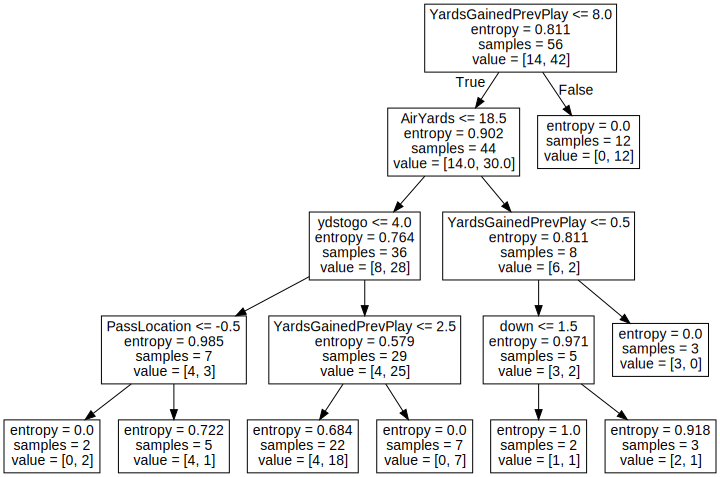

In [33]:
graph = graphviz.Source(dot_data)
graph

## Exercise 3 Save a Visualization of Decision Tree (0.5 points)
You can save the visualization of decision tree in a PDF file using graph.render command below. Replace '????' with ** your first initials ** (e.g., jy for me).  After executing the code below with the file name, you should be able to find the file (with .pdf extension) in the DS200F24 folder of your Google Drive.

In [34]:
path3='/content/drive/My Drive/DS200F24/Ben_pass_vx_10_22_Ex3'
graph.render(path3)

'/content/drive/My Drive/DS200F24/Ben_pass_vx_10_22_Ex3.pdf'

### Exercise 4 Interpret a Decision Tree (1 point)
- (1) Find a leaf node in your decision tree that has the largest number of samples. Describe the prediction associated with the node.
- (2) Describe the rule associated with the path from the root node to the leaf node.  When possible, **describe a condition of the "False" branch by negating the condition** so that it is easier for humans to understand.  For example, a condition of "PassLocation < 0.5 is False" can be more easily understood as "PassLocation >= 0.5".

### Answer to Exercise 5:
- (1) YardsGainedPrevPlay has the most samples: 56 samples. 14 samples are negative; 42 samples are positive. Therefore, the probability of a false test is 14/56 or 0.25. The probability of a true test is 42/56 or 0.75.
- (2) The root node follows the rule YardsGainPrevPlay > 8 to the leaf node of False. There are more routes to the other 6 leaf nodes involving other rules.

# Evaluate the Decision Tree: Using the Decition Tree for Prediction on Testing Data (Data Not Used for Training the DT)

In [35]:
predicted_completion = clf.predict(testing_X)

In [36]:
print(predicted_completion)

[1 1 0 1 1 1 0 1 1 1 1 1 1 1]


In [37]:
print(testing_Y)

[0 1 0 0 1 1 0 1 1 1 0 1 1 1]


In [38]:
print(metrics.classification_report(testing_Y, predicted_completion))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.75      1.00      0.86         9

    accuracy                           0.79        14
   macro avg       0.88      0.70      0.71        14
weighted avg       0.84      0.79      0.76        14



In [39]:
metrics.confusion_matrix(testing_Y, predicted_completion)

array([[2, 3],
       [0, 9]])

# Demonstrate the Principle of Decision Tree Learning
- Selection of Thrsholds
- Entropy of the Probability Distribution of Class Labels

# How was the threshold of a Feature Test determined?

*   Sort the values of the feature
*   Consider every mid-point of two adjacent values as a candidate threshold.





In [40]:
sorted_YGPP_table = training_table.sort("Yards.Gained.PrevPlay", descending=False)

In [41]:
sorted_YGPP_table.show(50)

down,ydstogo,Yards.Gained.PrevPlay,AirYards,PassLocation,PassOutcome
3,18,-6,17,-1,1
2,15,-5,7,0,1
2,13,-3,-2,-1,1
2,12,-2,23,1,0
3,5,-1,6,-1,1
3,6,-1,2,-1,1
1,10,0,9,1,1
1,10,0,7,-1,1
1,10,0,5,1,0
2,10,0,25,1,0


In [42]:
YGPP_values_table = sorted_YGPP_table.pivot("PassOutcome","Yards.Gained.PrevPlay")

In [43]:
YGPP_values_table.show(20)

Yards.Gained.PrevPlay,0,1
-6,0,1
-5,0,1
-3,0,1
-2,1,0
-1,0,2
0,8,15
1,1,1
2,1,2
3,0,1
4,0,1


In [44]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [45]:
YGPP_array = training_table.values[:, 2]
PassOutcome_array = training_table.values[:, 5]

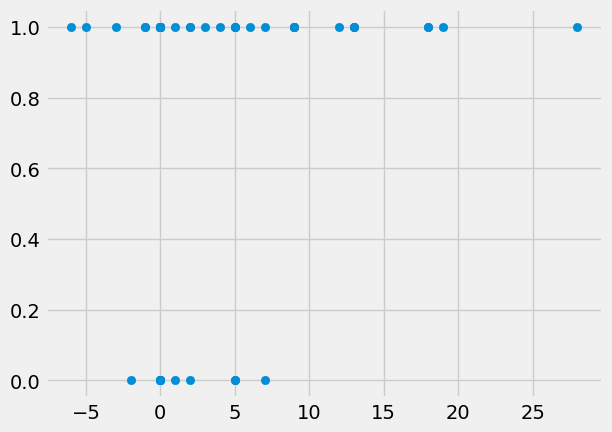

In [46]:
plots.scatter(YGPP_array,PassOutcome_array)

# Demonstrate the Principle of Decision Tree Learning
- Selection of Thrsholds
- **Entropy of the Probability Distribution of Class Labels**

In [47]:
def entropy(prob_list):
  length = len(prob_list)
  entropy = 0
  for i in range(length):
    if prob_list[i] == 0:
      entropy = entropy + 0
    else:
      entropy = entropy - prob_list[i] * np.log2(prob_list[i])
  return entropy

# Problem 4 (1 point)
- (a) Using the function above, compute the entropy of the three nodes in slide 34 of Topic 9. (0.5 point)
- (b) Compute the Expected Information Gain of the feature test at the root node of slide 34. (0.5 point)

# Put answer to Problem 4 (a) in the following code cells:

In [48]:
# The input to entropy is a list of probability. [Prob(incomplete), Prob(complete)]
# For example, the following list is for Prob(incomplete)=0.5
# Notice: Prob(incomplete) + P(complete)=1
list = [0, 1]

In [49]:
entropy(list)

0.0

In [53]:
listRoot= entropy([14/56, 42/56])
print(listRoot)

0.811278124459


In [54]:
listTrueChild= entropy([14/44, 30/44])
print(listTrueChild)

0.902393282795


In [55]:
listFalseChild= entropy([0/12, 12/12])
print(listFalseChild)

0.0


# Enter Answer to Problem 4 (b) in the code cell below:

Expected Information Gain =

p(True Bowl) * [Ebefore – Entropy(True Bowl) ] +
p(False Bowl) * [Ebefore – Entropy(False Bowl) ]
Copyright @ 2024 John Yen, All Rights Reserved 29


In [56]:
# Code for Exepcted Information Gain
EIG = (44/56) * (listRoot - listTrueChild) + (12/56) * (listRoot - listFalseChild)


In [57]:
print(EIG)

0.102254830835
